> **Data Summary**: The data for analysis is TMDb movie data. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.It would be a great idea to further sleuth this dataset in order to bring out hidden insights, patterns and analytics with regards to the same dataset.

> This analysis also ecplores an advance profiling tools to profile the variables within the dataset by using Pandas Profiling Report to further show at a glance the relationship, statistics and correlations amongst the variables

# Project: TMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Research Questions**: The data for analysis is TMDb movie data. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.It would be a great idea to further sleuth this dataset in order to bring out hidden insights, patterns and analytics with regards to the same dataset.
>
> The analysis would answer the following questions:

> 1. Research Question 1: Who are the Top 10 Directors based on Total Revenue?
> 2. Research Question 2: How has movies runtime changed over time based on a benchmark of 40minutes?
> 3. Research Question 3: What are the longest movies and shortest movie ?
> 4. Research Question 4: What are the most keywords used ?
> 5. Research Question 5: What is the year with the most number of movies released ?
> 6. Research Question 6a: What is the Movie with highest and lowest profit?
> 7. What are the Top 10 most profitable movies?

# 1.1 Loading of Packages
### Required packages loaded for the data analysis

In [2]:
# importing all necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for advance visualization and Look and fill
%matplotlib inline 
sns.set_style('darkgrid')
from wordcloud import WordCloud

<a id='wrangling'></a>
## Data Wrangling

> **Aim**: This section of the report aim to load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [98]:
# This section would show the process of importing data and cleaning of the data for analysis purposes


# 1.2 import the data
- Import the IMDB Data and read the first 5 entries of the dataset using Pandas Dataframe

In [3]:
# Display the first 2 rows of the dataframe with the head(2) function
# Pandas read_csv was used to load the dataset and assigned to movies

movies = pd.read_csv('tmdb-movies.csv')
movies.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.  ...   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

# 1.3 Data inspection
- At this point, one should inspect the dataframe's columns, variable types, shapes, info, etc

In [4]:
# To see the first 5 rows of the dataset
movies.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [21]:
#using an advance profile report on the dataset

import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(movies, explorative=True, dark_mode=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#To confirm the shape of the dataframe. 
# ( This shows that the origanal dataset came with 10,866 rows and 21 columns)

movies.shape

(10866, 21)

In [6]:
# Toview all columns as a list in order to drop unwanted columns
list(movies.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [8]:
#The count of entries in each columns. 
# Apparently some of the columns have missing values and some needs to be dropped
movies.count()

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

In [7]:
# The describe() function was used to find a general overview of the entire dataset before cleaniong
movies.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [8]:
# To confirm the data types, let's use the info()

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
# Confirming null values in the dataset and sort 
# -- This works for missing values columb level

movies.isnull().sum().sort_values(ascending=False)
# movies.isnull().sum(axis=0).sort_values(ascending=False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
budget_adj                 0
release_year               0
vote_average               0
vote_count                 0
release_date               0
id                         0
runtime                    0
original_title             0
revenue                    0
budget                     0
popularity                 0
revenue_adj                0
dtype: int64

In [10]:
#checking missing values on rows level by changes the axis parameter to 1
movies.isnull().sum(axis=1).sort_values(ascending=False)

997     6
2397    6
5413    6
2370    6
3369    6
       ..
4670    0
4678    0
4681    0
4702    0
5433    0
Length: 10866, dtype: int64

In [12]:
# To confirm % missing items in each column, divide the missing values by the lenght of the dataframe
# From the % of missing values below, homepage has the highest level of missing values

movies.isnull().sum(axis=0).sort_values(ascending=False)/len(movies) *100



homepage                72.979937
tagline                 25.989324
keywords                13.740107
production_companies     9.479109
cast                     0.699429
director                 0.404933
genres                   0.211669
imdb_id                  0.092030
overview                 0.036812
budget_adj               0.000000
release_year             0.000000
vote_average             0.000000
vote_count               0.000000
release_date             0.000000
id                       0.000000
runtime                  0.000000
original_title           0.000000
revenue                  0.000000
budget                   0.000000
popularity               0.000000
revenue_adj              0.000000
dtype: float64

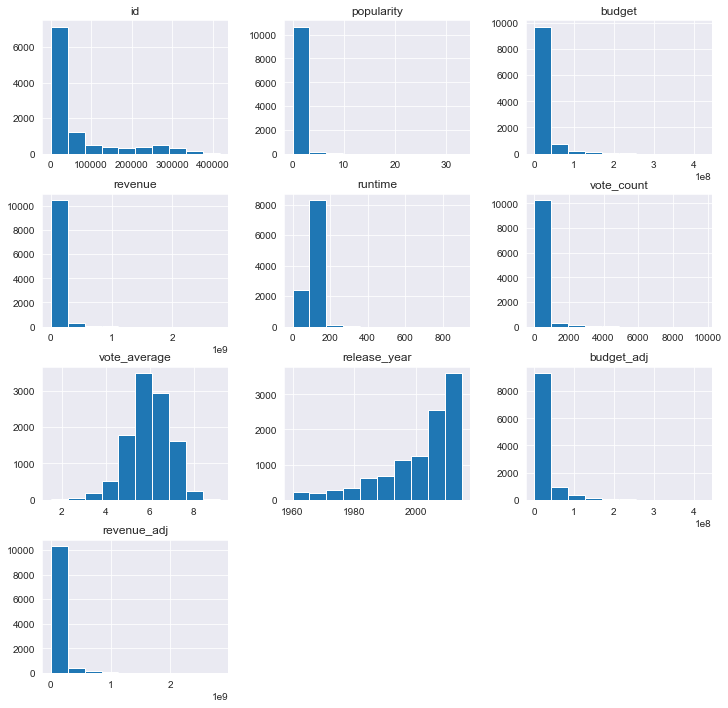

In [11]:
# The hist() function was used to do a general overview of relationship amongst the datasets
movies.hist(figsize=(12,12));



### Data Cleaning 

In [12]:
# Droping the below columns as they would not be needed for this analysis
# Creating a Function to remove unnecessary columns

def remove_columns(columns):
    return movies.drop(columns= columns,inplace= True)

# Calling the above function to remove 'homepage','imdb_id','tagline','overview','budget_adj','revenue_adj
columns_list = ['homepage','imdb_id','tagline','overview','budget_adj','revenue_adj']
remove_columns(columns_list)

In [16]:
# Describing the first 5 rows of the analysis
movies.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

In [17]:
# checking the overview of the variables
movies.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year  
count  10866.000000  10866.000000  10866.000000  
mean     217.389748      5.974922   2001.322658  
std      575.619058      0.935142     12.812941  
min       10.000000      1.500000   1960.000000  
25%       17.000000      5.400000   1995.000000  
50%       38.000000      6.000000   2006.000000  
75%      145.750000      6.600000   2011.000000  
max     9767.000000      9.200000   2015.000000

In [18]:
# Convert the release date field to a date time using pandas to_datetime function
movies.release_date = pd.to_datetime(movies.release_date, format = '%m/%d/%y')

In [19]:
#verify if the field has been converted
movies.release_date.dtype

dtype('<M8[ns]')

<a id='eda'></a>
## Exploratory Data Analysis

> After the cleaning of the data, this section would show the approach used in exploring the data by creating statistics and several visualizations with the goal of addressing the research questions that were posed in the Introduction section. This also shows relationships between variables.

### Research Question 1: Who are the Top 10 Directors based on Total Revenue?

In [28]:
#Top 10 Directors with highest revenue in billion dollars

Rev_Top10_Directors = movies.groupby('director').revenue.sum().sort_values(ascending=False).head(10)/1000000000
Rev_Top10_Directors

director
Steven Spielberg     9.018564
Peter Jackson        6.523245
James Cameron        5.841895
Michael Bay          4.917208
Christopher Nolan    4.167549
David Yates          4.154296
Robert Zemeckis      3.869691
Chris Columbus       3.851492
Tim Burton           3.665415
Ridley Scott         3.649996
Name: revenue, dtype: float64

In [29]:
#Top 10 Directors with highest mean average score

movies.groupby('director').revenue.sum().sort_values(ascending=False).head(10)

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
David Yates          4154295625
Robert Zemeckis      3869690869
Chris Columbus       3851491668
Tim Burton           3665414624
Ridley Scott         3649996480
Name: revenue, dtype: int64

### Research Question 2: How has movies runtime changed over time based on a benchmark of 40minutes?

- This is intended to check if movies run time is changing over time based on the benchmark of 40 minutes which a video is said to be regarded as a video by the IMDB definition. Hence, in an attempt to answer this question, it is normal to filter out movies whose run time length is higher than 40 minutes and show its descriptive analysis

In [30]:
# The below report shows the descriptive analysis of movies greater than 40 minutes run time based 
# on the standard runtime for a movie. The max moview lentgh shows 900 minutes with 25% less than 90 min,
# 505 less than 99 minutes and 75% less than 112 minutes

movies_runtime = movies[movies.runtime > 40]
movies_runtime.describe()

id    popularity        budget       revenue       runtime  \
count   10615.000000  10615.000000  1.061500e+04  1.061500e+04  10615.000000   
mean    64950.986057      0.653271  1.496338e+07  4.076227e+07    104.198210   
std     91380.079679      1.006645  3.119205e+07  1.182173e+08     28.455862   
min         5.000000      0.000065  0.000000e+00  0.000000e+00     41.000000   
25%     10516.000000      0.210596  0.000000e+00  0.000000e+00     90.000000   
50%     20069.000000      0.386529  0.000000e+00  0.000000e+00     99.000000   
75%     73455.000000      0.721961  1.600000e+07  2.558397e+07    112.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year  
count  10615.000000  10615.000000  10615.000000  
mean     221.333490      5.959133   2001.221856  
std      581.700144      0.930496     12.823190  
min       10.000000      1.500000   1960.000000  
25%       17.000000      5.400000   1994.000000  
50%       39.000000      6.000000   2005.000000  
75%      149.500000      6.600000   2011.000000  
max     9767.000000      9.200000   2015.000000

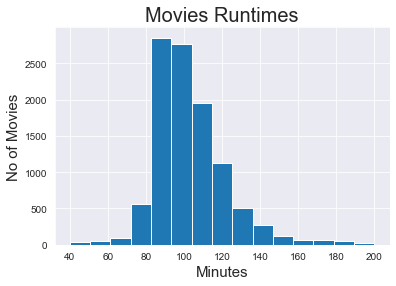

In [31]:
# The below histrogram shows the plot and distribution of movie runtime per minutes
plt.hist(movies_runtime.runtime, range=(40,200), bins=15)
plt.title('Movies Runtimes', fontsize = 20)
plt.xlabel('Minutes', fontsize = 15)
plt.ylabel('No of Movies', fontsize = 15)
plt.show()

#### Based on the above histogram, it can be seen that majority of the movie have a mean runtime had between 90 and 110 minutes. 

In [33]:
# Grouping movies that are greater than or equals to 40 minutes runtime
grouped_movies = movies_runtime.runtime.groupby(movies_runtime.release_year).describe()


In [34]:
# Checking out the disparity between the average mean, median and standard deviation of movie runtime
avg_runtime_by_year = grouped_movies['mean']
avg_runtime_min = grouped_movies['mean'] - grouped_movies['std']
avg_runtime_max = grouped_movies['mean'] - grouped_movies['std']

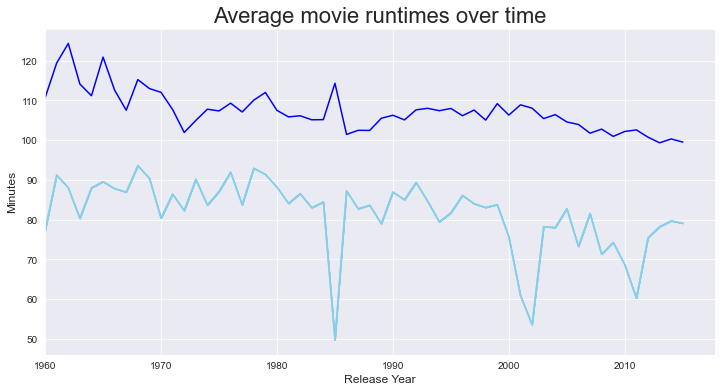

In [35]:
fig, x = plt.subplots(figsize = (12, 6))
x.plot(avg_runtime_by_year, color = "blue")
x.plot(avg_runtime_min, color = "skyblue")
x.plot(avg_runtime_max, color = "skyblue")
x.fill_between(grouped_movies.index, avg_runtime_min, avg_runtime_max, color="skyblue")
x.set_title('Average movie runtimes over time', fontsize = 22)
x.set_xlabel('Release Year', fontsize = 12)
x.set_ylabel('Minutes', fontsize = 12)
x.set_xlim(1960)
plt.show()

In [36]:
# Creating a copy of the dataframe to be grouped by decades
movies_by_decades = movies_runtime.copy()
movies_by_decades['release_year'] = ((movies_by_decades['release_year'] // 10) * 10).astype('int64')

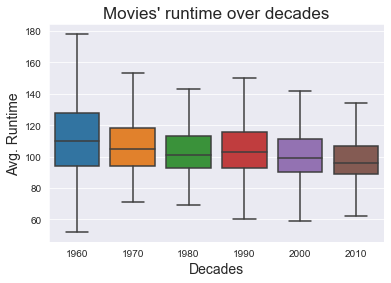

In [37]:
#  visualization of movies runtime grouped by decades
sns.boxplot(x = "release_year", y = "runtime", data = movies_by_decades, showfliers=False)
plt.title('Movies\' runtime over decades', fontsize = 17)
plt.xlabel('Decades', fontsize = 14)
plt.ylabel('Avg. Runtime', fontsize = 14)
plt.show()

#### The above boxplot shows that average movie runtime over decades has not shown a wide difference. Hence, human beings might be having much work and task to address than sitting down to watch them. 

### Research Question 3: What are the longest movies and shortest movie ?

In [38]:
# Movies woth the maximum runtime length
print(movies_runtime.original_title[movies_runtime.runtime == movies_runtime.runtime.max()])
print(movies_runtime[movies_runtime.runtime == movies_runtime.runtime.max()])

3894    The Story of Film: An Odyssey
Name: original_title, dtype: object
          id  popularity  budget  revenue                 original_title  \
3894  125336    0.006925       0        0  The Story of Film: An Odyssey   

                                                   cast      director  \
3894  Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...  Mark Cousins   

                                               keywords  runtime       genres  \
3894  cinema|nouvelle vague|hindi cinema|cinema novo...      900  Documentary   

     production_companies release_date  vote_count  vote_average  release_year  
3894                  NaN   2011-09-03          14           9.2          2011  


In [39]:
# Movies woth the minimum runtime length
print(movies_runtime.original_title[movies_runtime.runtime == movies_runtime.runtime.min()])
print(movies_runtime[movies_runtime.runtime == movies_runtime.runtime.min()])

1029    Marvel: 75 Years, From Pulp to Pop!
1750                          Hulk vs. Thor
1752                       Under the Sea 3D
4874          Amy Schumer: Mostly Sex Stuff
6691                            Deep Sea 3D
Name: original_title, dtype: object
          id  popularity  budget  revenue  \
1029  299969    0.293107       0        0   
1750  101907    0.256975       0        0   
1752   36123    0.251166       0        0   
4874  185744    0.089841       0        0   
6691   17700    0.604070       0        0   

                           original_title  \
1029  Marvel: 75 Years, From Pulp to Pop!   
1750                        Hulk vs. Thor   
1752                     Under the Sea 3D   
4874        Amy Schumer: Mostly Sex Stuff   
6691                          Deep Sea 3D   

                                                   cast     director  \
1029  Emily VanCamp|Stan Lee|Axel Alonso|Joe Quesada...  Zak Knutson   
1750  Graham McTavish|Fred Tatasciore|Matthew Wolf|J...   

#### The longest moview from the dataset is The Story of Film: An Odyssey with 900 minute which is equivalent to about 15 hours
#### There were more than one shrtest movies. The list are:  Marvel: 75 Years, From Pulp to Pop!, Hulk vs. Thor, Under the Sea 3D, Amy Schumer: Mostly Sex Stuff and Deep Sea 3D with a runtime of 41 Minutes each

### Research Question 4: What are the most keywords used ?

In [41]:
# Splitting the Keyword column to confirm which keywor was majorly used
keyw = ','.join(movies_runtime.keywords.str.cat(sep='|').split('|'))

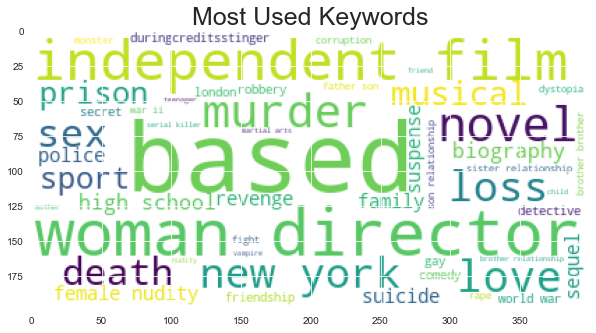

In [42]:
# using wordcloud to visualize movies with the highest keywords
cnt = WordCloud(max_words = 50, background_color = 'white').generate(keyw)
plt.figure(figsize=(10,10))
plt.imshow(cnt)
plt.title('Most Used Keywords', fontsize=25)
plt.show()

### Research Question 5: What is the year with the most number of movies released ?

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


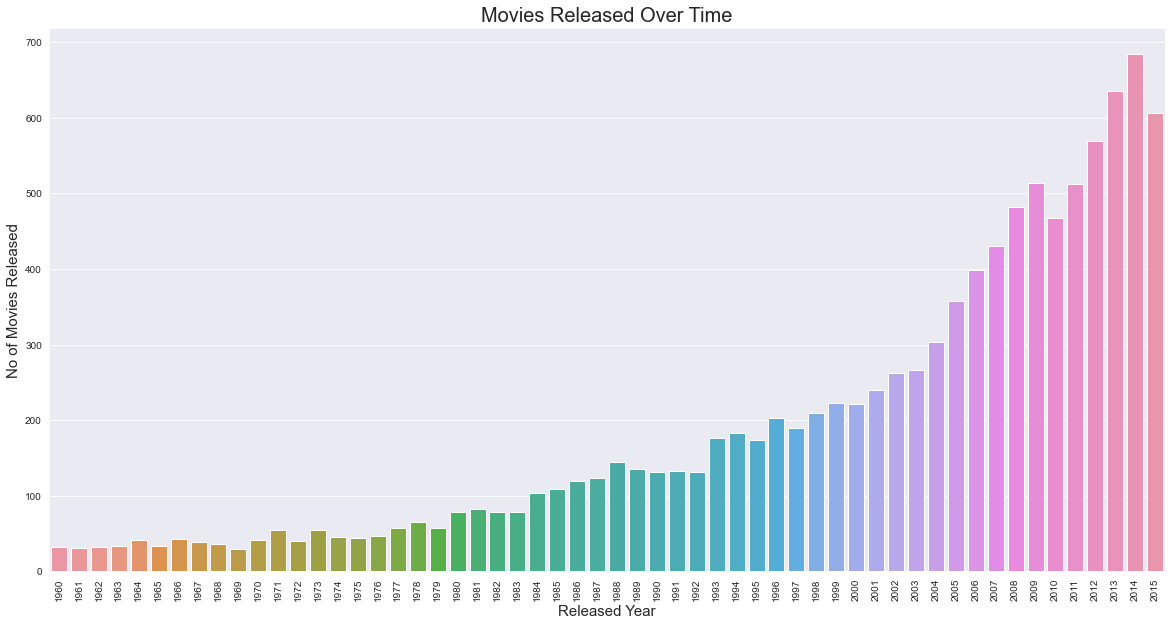

In [43]:
# Visualization of year with the most number of movies released

plt.figure(figsize=(20,10))
sns.countplot(movies_runtime.release_year)
plt.title('Movies Released Over Time', fontsize = 20)
plt.xlabel('Released Year', fontsize = 15)
plt.ylabel('No of Movies Released', fontsize = 15)
plt.xticks(rotation = 90)
plt.show();

### No of movies released has increased considerably over time. However, the highest movies where released in the the year 2014 

In [55]:
# print a sentence for the the with the highest movies released
print("In 2014, A total of {} movies were released and this account for the highest ever released movies over time. ".format(movies_runtime.release_year[movies_runtime.release_year == 2014].count()))

In 2014, A total of 685 movies were released and this account for the highest ever released movies over time. 


In [44]:
# descriptive analysis of movies with 40 minutes or above runtime
movies_runtime.describe()

id    popularity        budget       revenue       runtime  \
count   10615.000000  10615.000000  1.061500e+04  1.061500e+04  10615.000000   
mean    64950.986057      0.653271  1.496338e+07  4.076227e+07    104.198210   
std     91380.079679      1.006645  3.119205e+07  1.182173e+08     28.455862   
min         5.000000      0.000065  0.000000e+00  0.000000e+00     41.000000   
25%     10516.000000      0.210596  0.000000e+00  0.000000e+00     90.000000   
50%     20069.000000      0.386529  0.000000e+00  0.000000e+00     99.000000   
75%     73455.000000      0.721961  1.600000e+07  2.558397e+07    112.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year  
count  10615.000000  10615.000000  10615.000000  
mean     221.333490      5.959133   2001.221856  
std      581.700144      0.930496     12.823190  
min       10.000000      1.500000   1960.000000  
25%       17.000000      5.400000   1994.000000  
50%       39.000000      6.000000   2005.000000  
75%      149.500000      6.600000   2011.000000  
max     9767.000000      9.200000   2015.000000

### The above analysis based of release year of Movies showed that 50% of the relaease happened after 2005. 

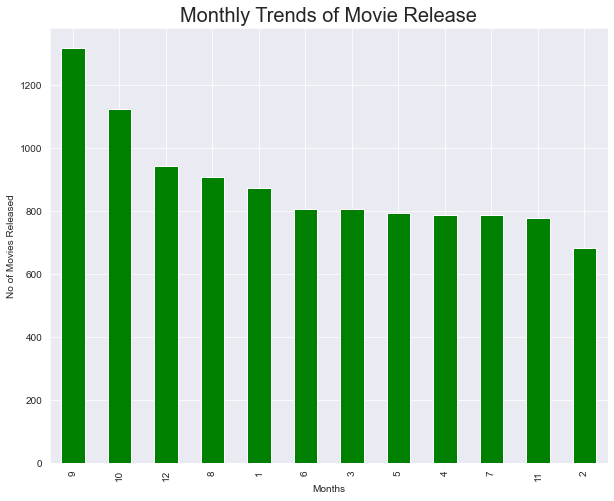

In [45]:
# Movies relese by year and runtime
plt.figure(figsize=(10,8))
movies_runtime.release_date.dt.month.value_counts().plot.bar(color = 'green')
plt.title('Monthly Trends of Movie Release', fontsize = 20)
plt.xlabel('Months')
plt.ylabel('No of Movies Released')
plt.show()

### From the above illustration, one can conclude that month movies release happened in the month of September

### Research Question 5a: What is the Movie with highest and lowest profit?
### 5b. What are the Top 10 most profitable movies?

In [46]:
# First let's calculate profit subtracting budget from Revenue

movies_runtime['profit'] = movies_runtime['revenue'] - movies_runtime['budget']

C:\Users\User\AppData\Local\Temp\ipykernel_14904\4102922038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_runtime['profit'] = movies_runtime['revenue'] - movies_runtime['budget']


In [48]:
# first 5 dataset of movies wose runtime are >= 40 minutes
movies_runtime.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year      profit  
0           6.5          2015  1363528810  
1           7.1          2015   228436354  
2           6.3          2015   185238201  
3           7.5          2015  1868178225  
4           7.3          2015  1316249360

In [49]:
# Movies with the highest Profit
print(movies_runtime.original_title[movies_runtime['profit'] == movies_runtime['profit'].max()])

1386    Avatar
Name: original_title, dtype: object


In [50]:
#Movie with the lowest profit
print(movies_runtime.original_title[movies_runtime['profit'] == movies_runtime['profit'].min()])

2244    The Warrior's Way
Name: original_title, dtype: object


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


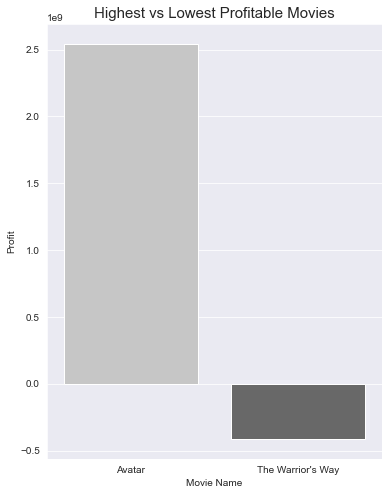

In [51]:
# Profitability of movies
plt.figure(figsize=(6,8))
disp = movies_runtime[(movies_runtime.profit == movies_runtime.profit.max())|(movies_runtime.profit==movies_runtime.profit.min())]
sns.barplot(disp['original_title'], disp['profit'], palette='Greys')
plt.title('Highest vs Lowest Profitable Movies', fontsize = 15)
plt.xlabel('Movie Name')
plt.ylabel('Profit')
plt.show()

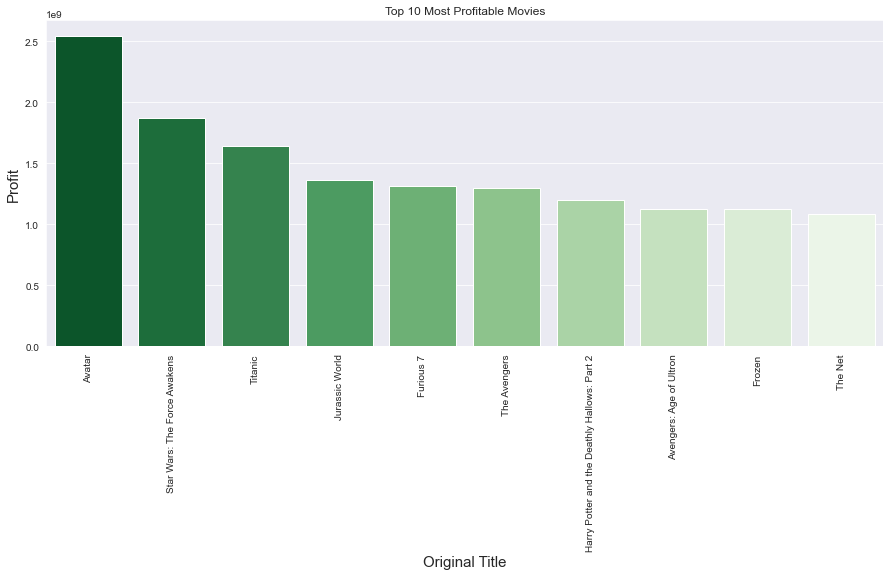

In [52]:
# Top 10 Most Profitable Movie
plt.figure(figsize=(15,6))
mp = movies_runtime[['original_title', 'profit']].sort_values('profit', ascending=False).head(10)
sns.barplot(x='original_title', y='profit', data=mp, palette='Greens_r')
plt.xlabel('Original Title', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.title('Top 10 Most Profitable Movies')
plt.xticks(rotation = 90)
plt.show()

### Above graph displays the top 10 most profitable movies and Avatar topped the list with The Net as the 10th most profitable Movie

<a id='conclusions'></a>
## Limitations

> **Key Note**: The research was limited to the data sources strictly from the TMDB and there were a little bit of time constraint while working on the project. 

> Also, all movies below 40mins were removed from the analysis to cater for the standard runtime of a movie which is 40 minutes

<a id='conclusions'></a>
## Conclusions

> **Summary 1**: From the analysis above it can be concluded that moview duration has been similar over time. Hence, interest and lack of interest to watching a lenthy moview is subject to individual peculiaries and duties at a particular point in time. A further analysis with respect to directors with the highest revenue showed that Steven Spielberg topped the list with a total sum of **9,018,563,772** 

> **Summary 2**: Also, it was discovered that There were more than one shrtest movies. The list are:  Marvel: 75 Years, From Pulp to Pop!, Hulk vs. Thor, Under the Sea 3D, Amy Schumer: Mostly Sex Stuff and Deep Sea 3D with a runtime of 41 Minutes each

> **Summary 3**:  No of movies released has increased considerably over time. However, the highest movies where released in the the year 2014. The analysis further showed that from the year 2005, the average release movies has been on the increase. However, the month of September has seen the most increase across the years within the dataset. 


> **Summary 4**:  Further to the aforementioned, it was further investigated and the analysis showed that ble movies and Avatar topped the list with The Net as the 10th most profitable Movie

In [14]:
#References
https://thecleverprogrammer.com/2021/09/22/movie-rating-analysis-using-python/

In [15]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295